#Классификация данных 2

- используемый датасет: Hearts Desease (https://archive.ics.uci.edu/dataset/45/heart+disease)

##загрузка данных и библиотек

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo

In [ ]:
heart_disease = fetch_ucirepo(id=45)

ds = heart_disease.data.features
ds_target = heart_disease.data.targets

print(heart_disease.variables)
display(ds)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


##.

In [ ]:
df = pd.concat([ds, ds_target], axis=1)
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(297, 14)

In [ ]:
df['num'].value_counts()  #классы

,count
num,
0,160
1,54
2,35
3,35
4,13


In [ ]:
from imblearn.over_sampling import SMOTE
#увеличивает данные для балансировки
smote = SMOTE(random_state=42)
x_balance, y_balance = smote.fit_resample(df.drop(['num'], axis=1), df['num'])

#уменьшает
#undersampler = RandomUnderSampler(random_state=42)
#x_balance, y_balance = undersampler.fit_resample(x_b, y_b)

df = pd.concat([x_balance, y_balance], axis=1)  #обновляем данные для работы

In [ ]:
df['num'].value_counts()  #ура сбалансировали

,count
num,
0,160
2,160
1,160
3,160
4,160


In [ ]:
'''
Определяет, является ли столбец числовым или категориальным.
:параметр
     :param df: dataframe - входные данные
     :param col:str - имя столбца для анализа
     :param max_cat: num — максимальное количество уникальных значений для распознавания столбца как категориального
:возвращает
     "cat", если столбец является категориальным или "num" в противном случае
'''

def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

 Categerocial   Numeric   NaN 


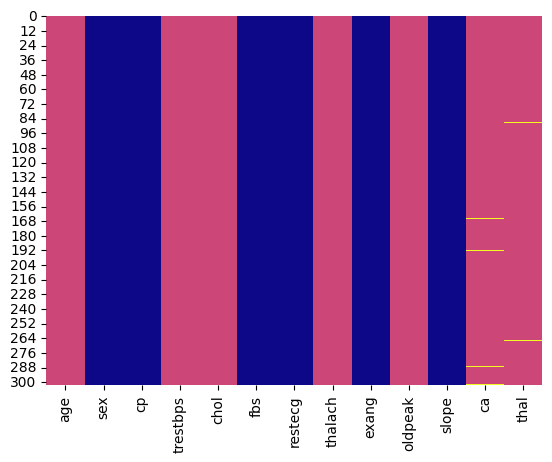

In [ ]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in ds.columns}  #словарь{название: категориальный/числовой}
heatmap = ds.isnull()   #датасет, который похож на изначальный датасет df, но в каждой ячейке вместо значений написано: False (если значение есть) True  (если в ячейке отсутствует значение)

for k,v in dic_cols.items():    #проходим по столбцам, и меняем значения:
    if v == "num":                                                              #для числовых
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)       #0.5, если False (то есть оно ненулевое); пишем 1, если True
    else:                                                                       #для категориальных
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)         #0, если False(то есть оно ненулевое); 1, если True

'''
тепловая карта:
0.5 - если значение есть и оно числовое
0   - если значение есть и оно категориальное
1   - если значения в ячейке нет
'''
sns.heatmap(heatmap, cbar=False, cmap='plasma')
print("\033[1;37;44m Categerocial ", "\033[1;37;45m Numeric ", "\033[1;30;43m NaN ")

Text(0.5, 0.98, 'вероятность сердечного заболевания')

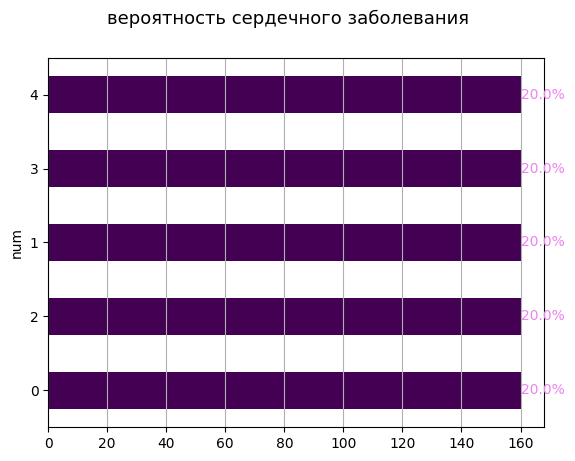

In [ ]:
#группируем объекты по целевой переменной и считаем, сколько объектов в каждой группе

y ='num'  #название столбца, по значению в котором группируем

ax = df[y].value_counts().sort_values().plot(kind="barh", cmap='viridis')   #считаем количество объектов с одинаковыми значениями в столбце y, сортируем и отрисовываем

#формируем надписи для графика
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10, color='violet')
ax.grid(axis="x")
plt.suptitle('вероятность сердечного заболевания', fontsize= 13)

##визуализация

<ipython-input-13-c8eda7016577>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: title={'center': 'outliers (log scale)'}>

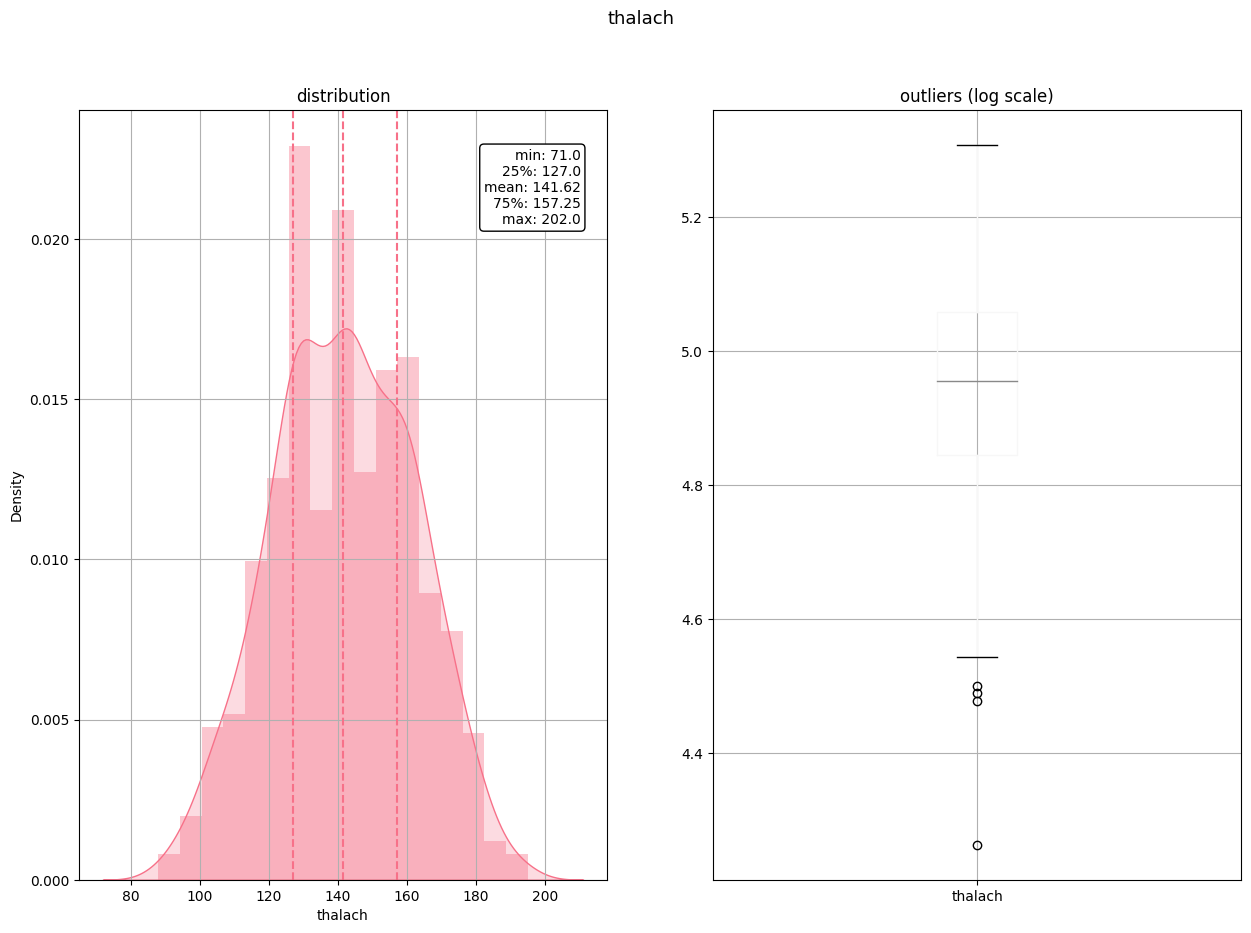

In [ ]:
#блочная диаграмма для графического отображения групп данных через их квартили

x = 'thalach'

'''
plt.subplots() возвращает кортеж, содержащий фигуру и объект(ы) осей.
plt.subplots() возвращает кортеж с двумя элементами: 1-й должен быть объектом фигуры, а 2й должен быть группой объектов второстепенных сюжетов.

При использовании fig, ax = plt.subplots()вы распаковываете этот кортеж в переменные figи ,ax.

Наличие fig полезно, если вы хотите изменить атрибуты уровня фигуры или сохранить фигуру как файл изображения позже
(например, с помощью fig.savefig('yourfilename.png')).
'''

fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=13)

#распределение
ax[0].title.set_text('distribution')  #задаем название
variable = df[x].fillna(df[x].mean())   #замена отсутствующих значений в датафрейме на средние
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))#вычисляем q-й квантиль заданных данных вдоль указанной оси.
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])#зададим данные для графика
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
'''
 Формируем надписи для графика
'''
### boxplot

ax[1].title.set_text('outliers (log scale)')#устанавливаем заголовок
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])

In [ ]:
#обернем все, что было в предыдущей ячейке - в функцию для удобства повторного использования

def show_dist(x, df):      #x - название столбца; df - датасет
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)
    ### distribution
    ax[0].title.set_text('distribution')
    variable = df[x].fillna(df[x].mean())
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable <
                                                  breaks[10])]
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
                 ax=ax[0])  #Запишем чтобы создать горизонтальную гистограмму
    des = df[x].describe()

    #квантильные и средние линии
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(
        ("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))

    ### boxplot
    ax[1].title.set_text('outliers (log scale)')
    tmp_df = pd.DataFrame(df[x])
    tmp_df[x] = np.log(tmp_df[x])
    tmp_df.boxplot(column=x, ax=ax[1])


<ipython-input-14-ae77d907c1cc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


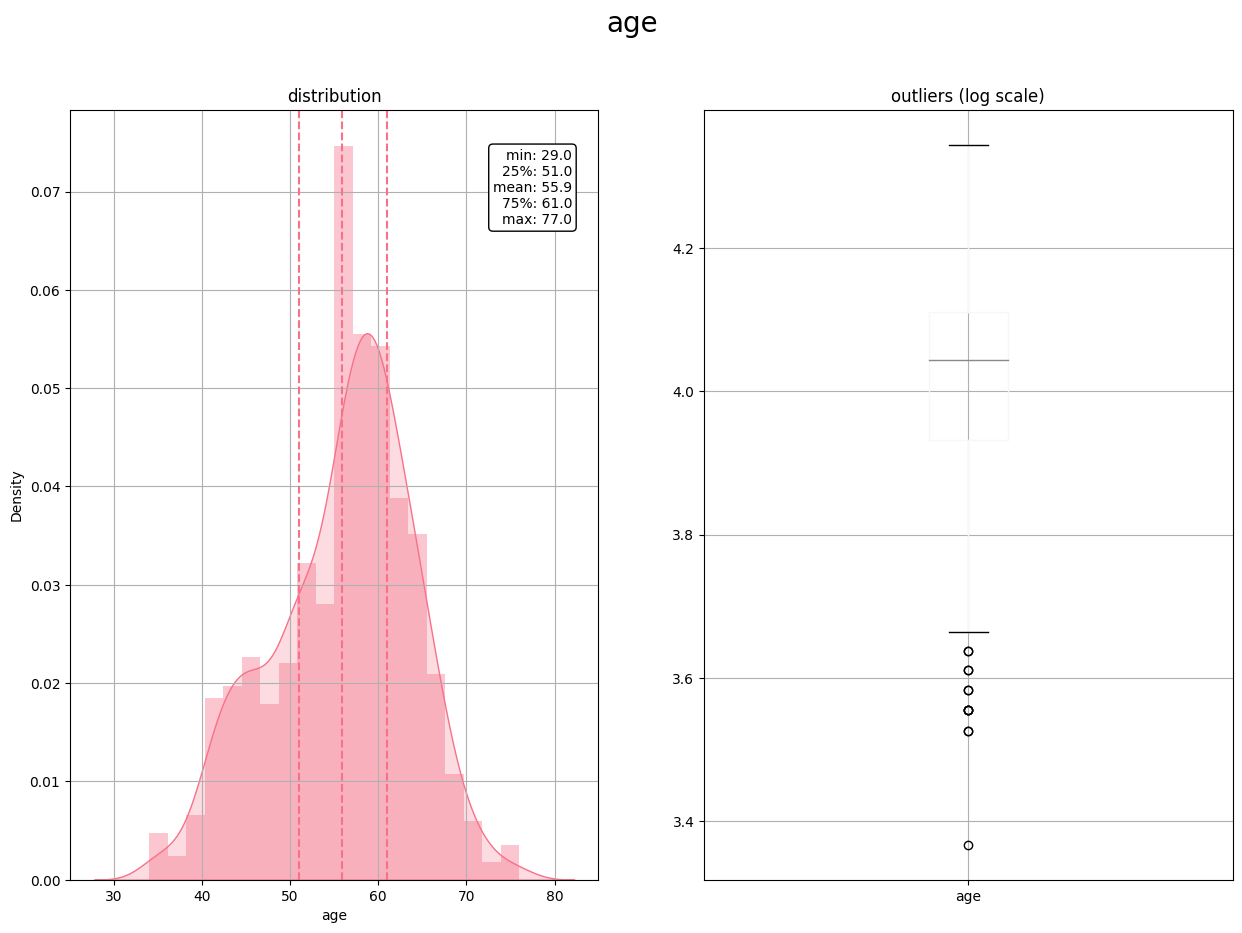

In [ ]:
show_dist('age', df)

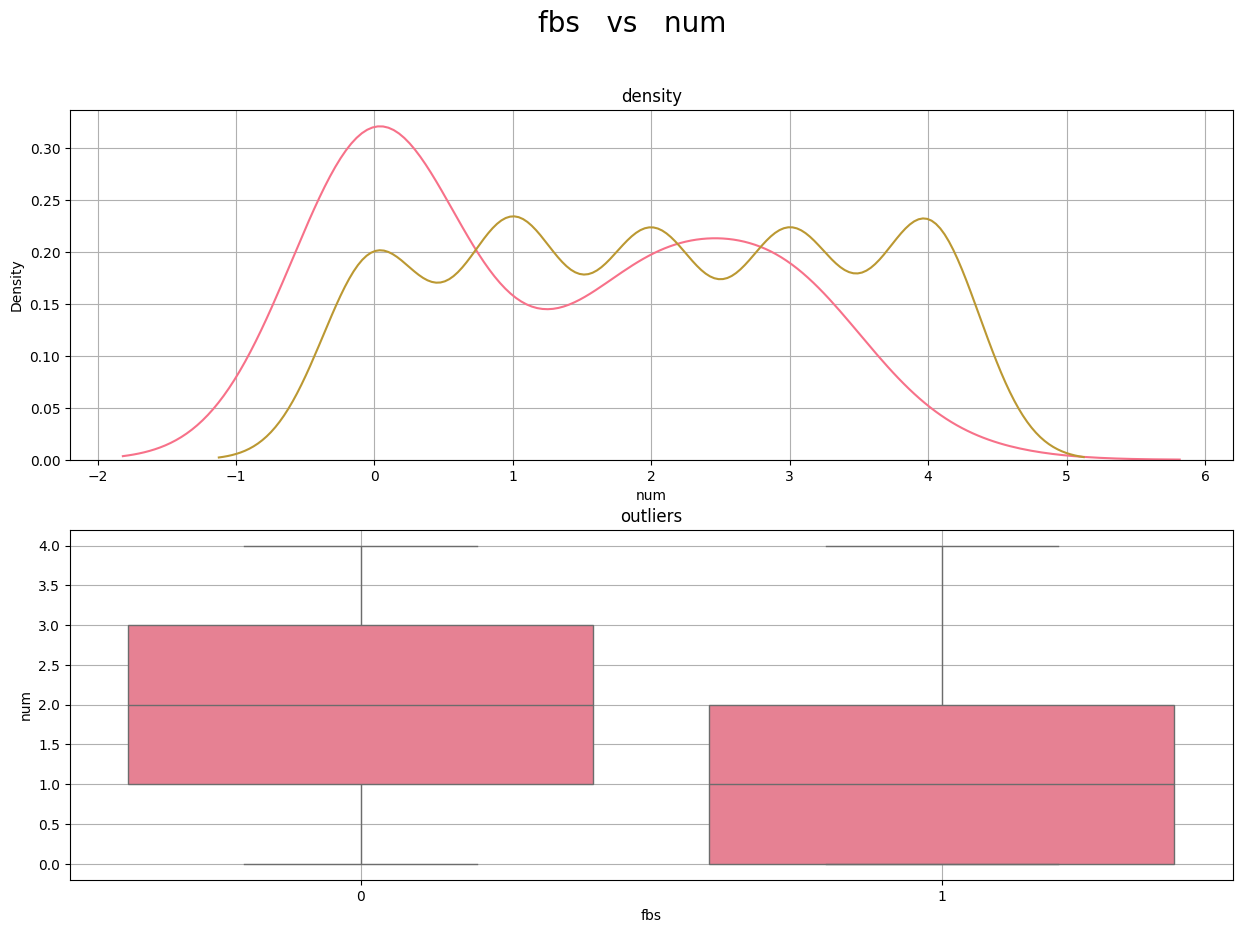

In [ ]:
#смотрим, обладает ли признак предсказательной силой для целевой переменной - num

x = 'fbs'
cat, num = 'fbs', 'num'
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10)) # распаковываем  кортеж в переменные figи ax.
fig.suptitle(x+"   vs   "+y, fontsize=20)# получаем объект рисунка и массив подграфиков,где первое число - количество строк,второе - столбцов, sharex, sharey задают нужно ли разделять ось между подграфиками

#распределение
### distribution
ax[0].title.set_text('density')
for i in df[cat].unique():  # перебираем все уникальные значения в столбце df[cat], cat="species"
    sns.kdeplot(df[df[cat]==i][num],   label=i, ax=ax[0])#Построим график плотности распределения в столбце num, при условии, что значение в столбце df[cat] совпадет с i
ax[0].grid(True)

### boxplot
ax[1].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=df, ax=ax[1])


ax[1].grid(True) #настройка линий сетки.

In [ ]:
 '''
    При разделении данных на обучающие и тестовые наборы вы должны следовать одному основному правилу:
        строки в обучающем наборе не должны также появляться в тестовом наборе.
        Это потому, что модель видит целевые значения во время обучения и использует их для понимания явления.
        Другими словами, модель уже знает правильный ответ для обучающих наблюдений (.
'''
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## split data , 70% - тренировочная выборка, 30% тестовая выборка
dtf_train, dtf_test = model_selection.train_test_split(df, test_size=0.3)

## print info
print("X_train shape:", dtf_train.drop("num", axis=1).shape, "| X_test shape:", dtf_test.drop("num",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["num"]),2), "| y_test mean:", round(np.mean(dtf_test["num"]),2))
print(dtf_train.drop("num",axis=1).shape[1], "features:", dtf_train.drop("num",axis=1).columns.to_list())

X_train shape: (560, 13) | X_test shape: (240, 13)
y_train mean: 2.01 | y_test mean: 1.98
13 features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
#датасеты для трейна
train_x = dtf_train[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ]]
train_y = dtf_train['num']

In [ ]:
#датасеты для теста
test_x = dtf_test[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ]]
test_y = dtf_test['num']

In [ ]:
# нормируем значения
Y = 'num'

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))#приведем Числовые переменные (Numeric Variable) к диапазону от 0 до 1.
X = scaler.fit_transform(train_x)#преобразуем данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1.
'''
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
'''
train_x_scaled = pd.DataFrame(X, columns=train_x.columns,index=train_x.index )
train_y_scaled = train_y

train_x_scaled.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
598,0.666667,0.0,1.000000,0.575472,0.064665,0.0,0.5,0.526718,0.0,0.878454,0.5,0.899522,1.000000
207,0.166667,0.0,0.666667,0.245283,0.193995,0.0,0.0,0.755725,0.0,0.000000,0.0,0.000000,0.000000
43,0.625000,1.0,0.666667,0.528302,0.187067,1.0,0.0,0.656489,0.0,0.258065,0.0,0.000000,0.000000
468,0.458333,1.0,1.000000,0.339623,0.096998,0.0,0.0,0.625954,1.0,0.212394,0.0,0.176566,0.882425
95,0.625000,1.0,1.000000,0.150943,0.249423,0.0,1.0,0.541985,1.0,0.193548,0.5,0.333333,1.000000


<ipython-input-14-ae77d907c1cc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


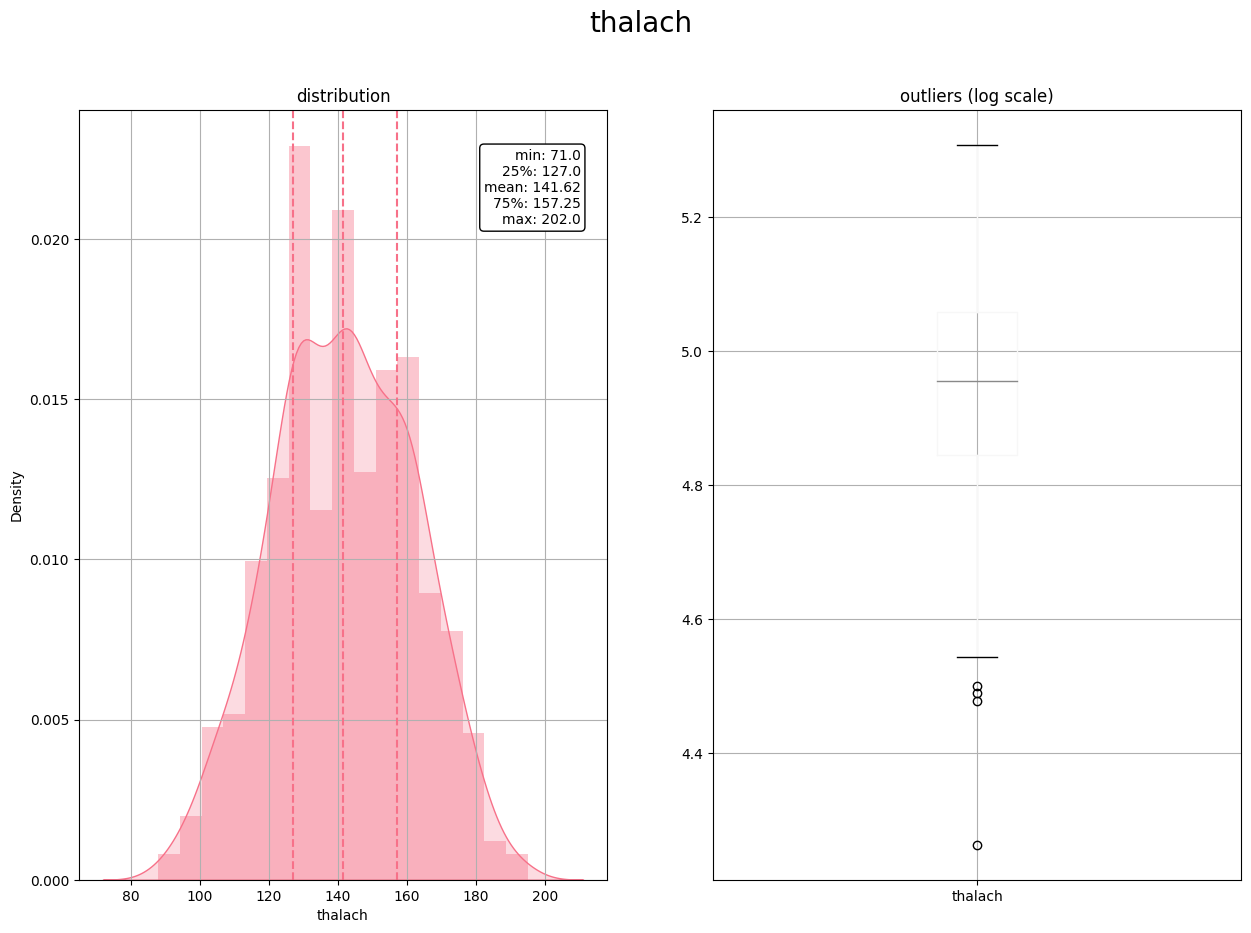

In [ ]:
show_dist('thalach', df) #используем ранее созданную нами функцию для отрисовки графиков

<ipython-input-14-ae77d907c1cc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True},
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


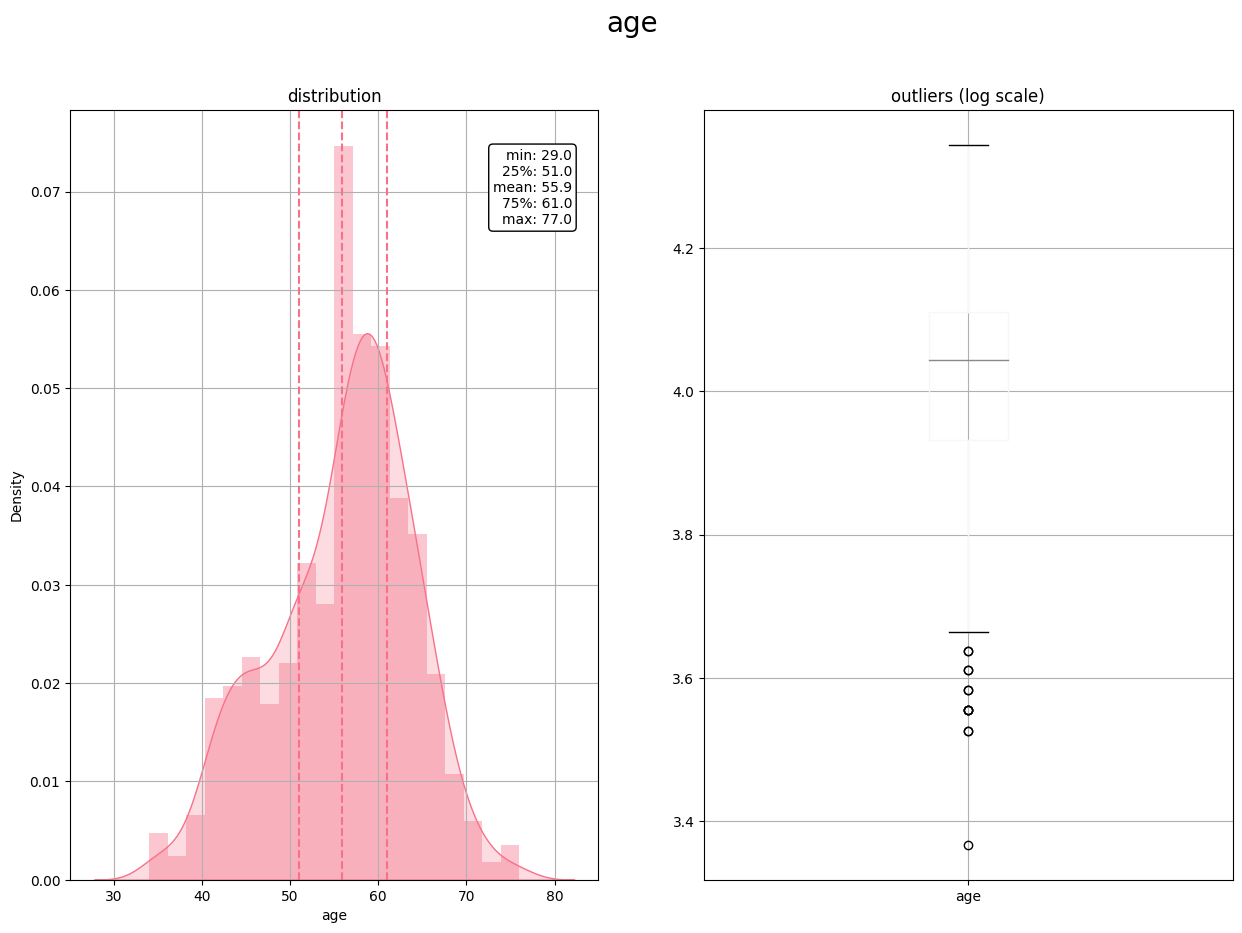

In [ ]:
show_dist('age', df) #используем ранее созданную нами функцию для отрисовки графиков

In [ ]:
X  #смотрим, что находится в х - результатет нормировке трейн_х

array([[0.66666667, 0.        , 1.        , ..., 0.5       , 0.89952164,
        1.        ],
       [0.16666667, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.625     , 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4375    , 1.        , 0.66666667, ..., 0.5       , 0.33333333,
        1.        ],
       [0.45833333, 1.        , 0.66666667, ..., 0.5       , 0.05409663,
        1.        ],
       [0.45833333, 1.        , 1.        , ..., 0.5       , 0.23210142,
        1.        ]])

In [ ]:
train_x.index   #какие индексы (номера объектов) остались в трейне

Index([598, 207,  43, 468,  95, 593, 586, 754, 564, 615,
       ...
       543,  41, 439,  62, 592, 467, 658,  56, 691, 574],
      dtype='int64', length=560)

In [ ]:
'''
Метод fit(data) используется для вычисления среднего значения и стандартного отклонения для данной функции, которые будут использоваться в дальнейшем для масштабирования.
Метод transform(data) используется для выполнения масштабирования с использованием среднего значения и стандартного отклонения, рассчитанного с использованием метода .fit().
Метод fit_transform() выполняет как подгонку, так и преобразование.
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
scaled_x_train - фрейм данных с именами объектов,
scaled_x_test.values - значения, без имен объектов
 '''
X = scaler.fit_transform(test_x)

test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
test_y_scaled = test_y

##построение модели

Text(0.5, 1.0, 'pearson correlation')

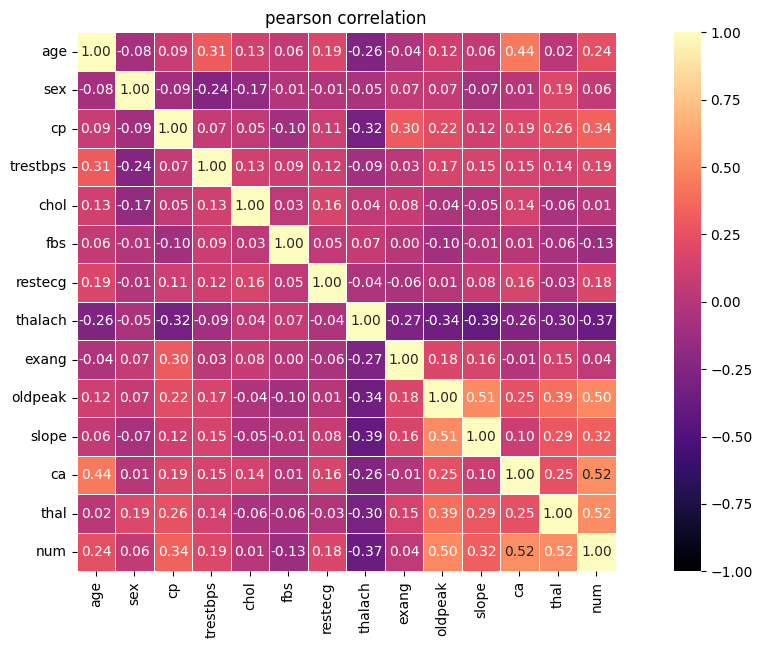

In [ ]:
#выбор параметров (фич, features)  — это процесс выбора для обучения модели подмножества параметров из всех параметров датасета.
#Это упрощает обучение модели и уменьшает вероятность переобучения (когда модель слишком сильно адаптируется к обучающим данным и плохо работает вне набора train).

corr_matrix = df
plt.figure(figsize=(15,7))

for col in corr_matrix.columns: #зададим условия для столбцов
  if corr_matrix[col].dtype == "O":
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson",numeric_only = True)

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="magma", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

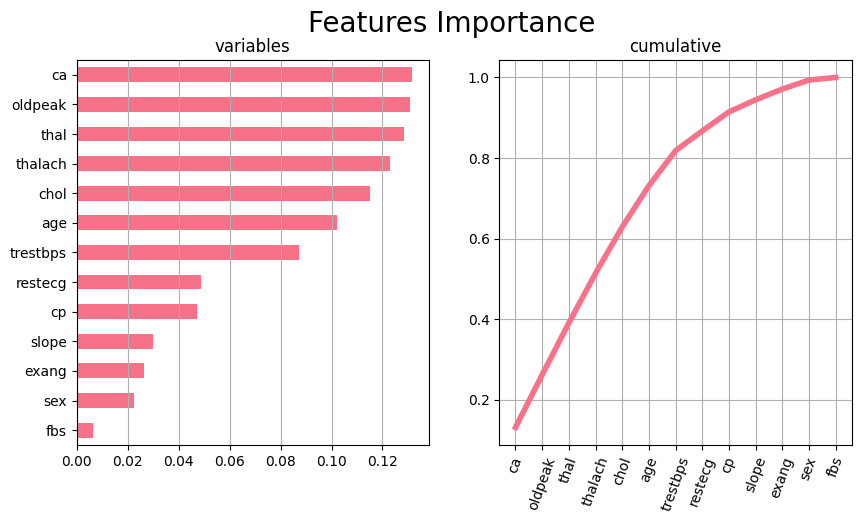

In [ ]:
# важность каждой фичи c помощью RandomForestClassifier
X = train_x_scaled.values
y = train_y_scaled.values
feature_names = train_x_scaled.columns.tolist()# имена столбцов в data.
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_ #это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas df
df_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")



fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')# подпишем график
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')# подпишем график
df_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)),
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')#Настроим линии сетки.

In [ ]:
#проектирование, обучение, тестирование и оценка модели мо

X_train = train_x_scaled[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_train = train_y_scaled

X_test = test_x_scaled[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_test = test_y_scaled

In [ ]:
'''
Будем использовать GradientBoostingClassifier - градиентный бустинг. Он строит предсказание в виде ансамбля слабых предсказывающих моделей,
которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную.
Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.
 Оценивать качество предсказаний будем по RandomizedSearchCV
'''

## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель
             'n_estimators':[100,250,500],  #количество деревьев, добавленных в модель
             'max_depth':[2,3,4,5],    #максимальная глубина дерева
             'min_samples_split':[2,4,6],    #задает минимальное количество выборок для разделения
             'min_samples_leaf':[1,3,5],     #минимальное количество выборок для формирования листа
             'max_features':[2,3,4],     #квадратный корень из функций обычно является хорошей отправной точкой
             'subsample':[0.7,0.8,0.9,1]}       #образцы, которые будут использоваться для подгонки индивидуального базового файла
## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_   # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне

Best Model parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 4, 'learning_rate': 0.1}
Best Model mean accuracy: 0.8375


In [ ]:
#X_train - тренировочный датасет
#y_train - это целевая переменная для каждого объекта в X_train.

#train
#заполняем модель данным из трайн датасетов
model.fit(X_train, y_train)

#test
predicted_prob = model.predict_proba(X_test) #прогнозирование

#predict() принимает только один аргумент , который представляет собой test датасет.

predicted = model.predict(X_test).astype('int32')

In [ ]:
#для каждого объекта получили вектор вероятностей отнесения этого объекта к классам num
predicted_prob

array([[1.22085723e-07, 1.07063372e-04, 4.41987522e-01, 2.43949862e-04,
        5.57661342e-01],
       [2.95618735e-06, 1.08722825e-02, 3.33617474e-01, 4.94762797e-02,
        6.06031007e-01],
       [1.19019082e-03, 3.70625481e-03, 9.75077584e-01, 2.00203289e-02,
        5.64163802e-06],
       ...,
       [7.88320311e-03, 9.85454113e-01, 1.77445422e-03, 4.62533599e-03,
        2.62893887e-04],
       [9.97280299e-01, 2.71945012e-03, 4.28938334e-09, 2.45805716e-07,
        4.35137603e-10],
       [9.17325789e-08, 1.51980059e-05, 9.88921095e-01, 1.10329040e-02,
        3.07109508e-05]])

In [ ]:
#смотрим метрики на тестовом датасете
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class='ovo',average= "weighted") #возвращаем долю правильно классифицированных выборок.
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))

#результат
## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.7
Auc: 0.93
Recall (all 1s predicted right): 0.7
Precision (confidence when predicting a 1): 0.72
Detail:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        50
           1       0.72      0.51      0.60        55
           2       0.55      0.78      0.65        41
           3       0.68      0.70      0.69        37
           4       0.85      0.77      0.81        57

    accuracy                           0.70       240
   macro avg       0.71      0.71      0.70       240
weighted avg       0.72      0.70      0.70       240



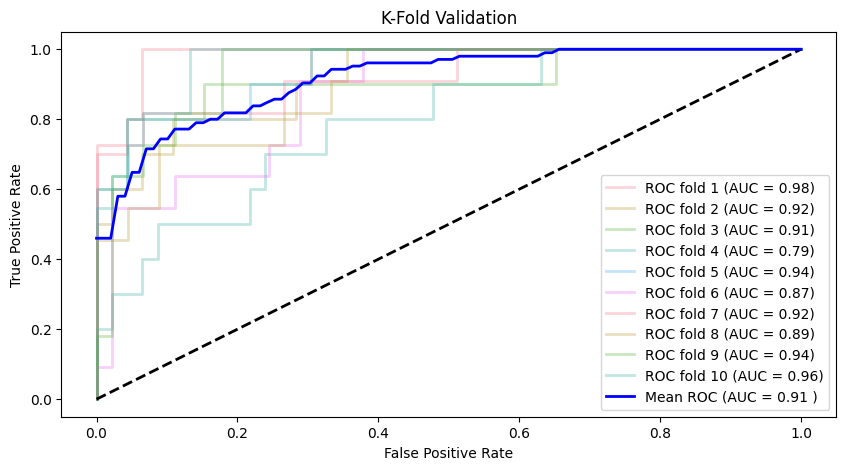

In [ ]:
#строим roc-кривые

cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):

    '''
iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
используя указанные значения индекса
X_train - это весь экземпляр с атрибутами,
y_train - это метка каждого экземпляра.
train_selected_test - Разделяет массивы / матрицы на случайные тестовые подмножества.

'''
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1


plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4')]

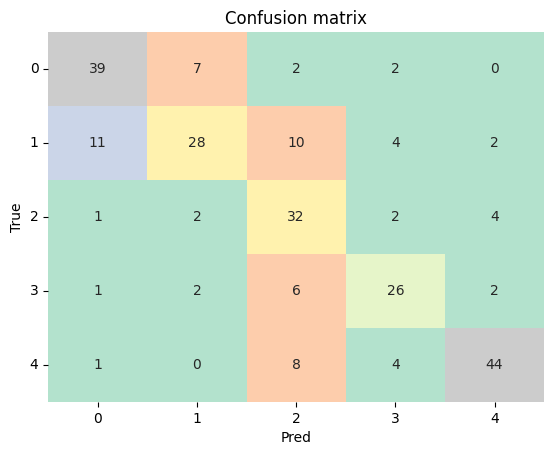

In [ ]:
#матрица ошибок (мультиклассовая)

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)

In [ ]:
#функция построения матрицы ошибок для класса

def compute_class(ls_res, class_value): # возвращаем строку имен классов
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c  == class_value  else 0)
    return  y_t_class

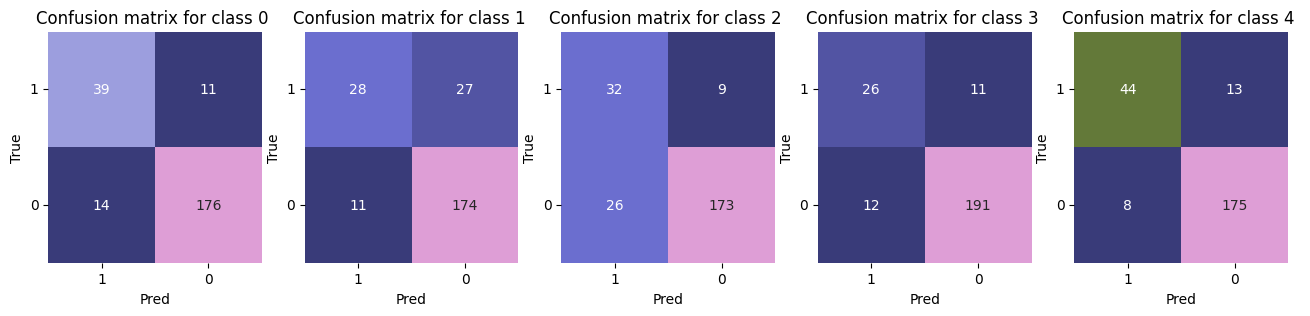

In [ ]:
#матрицы для каждого класса

classes = np.unique(y_test).astype(int)
lbs = [1,0]

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for class_i in classes:
    y_one_class = compute_class(y_test,class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()),class_i)#возвращает строку имен классов
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)
    sns.heatmap(cm, annot=True, fmt='d', cmap='tab20b', cbar=False, ax = ax[class_i])
    ax[class_i].set(xlabel="Pred", ylabel="True", title=f"Confusion matrix for class {class_i} ")
    ax[class_i].set_xticklabels(labels=lbs, rotation=0)
    ax[class_i].set_yticklabels(labels=lbs, rotation=0)

<Axes: title={'center': 'Threshold Selection'}, xlabel='Threshold', ylabel='Score'>

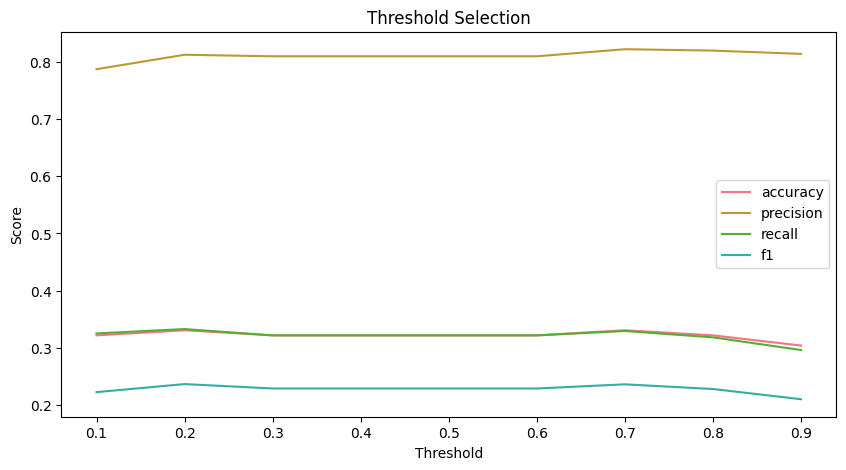

In [ ]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))

dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)